In [16]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
# cargamos el dataset
data = pd.read_csv('./avocado.csv')

# total = df[df.geography == 'Total U.S.']

df1 = data.copy(deep = True)
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date',inplace = True)
df1 = df1.resample('W').sum()
df1.head()

#Escalar los datos
df1['Log_AveragePrice'] = np.log(df1['AveragePrice'])

In [18]:
with open('modelo_sarima.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [48]:
prediction = loaded_model.predict(start = '2018-03-25', end = '2022-03-25')

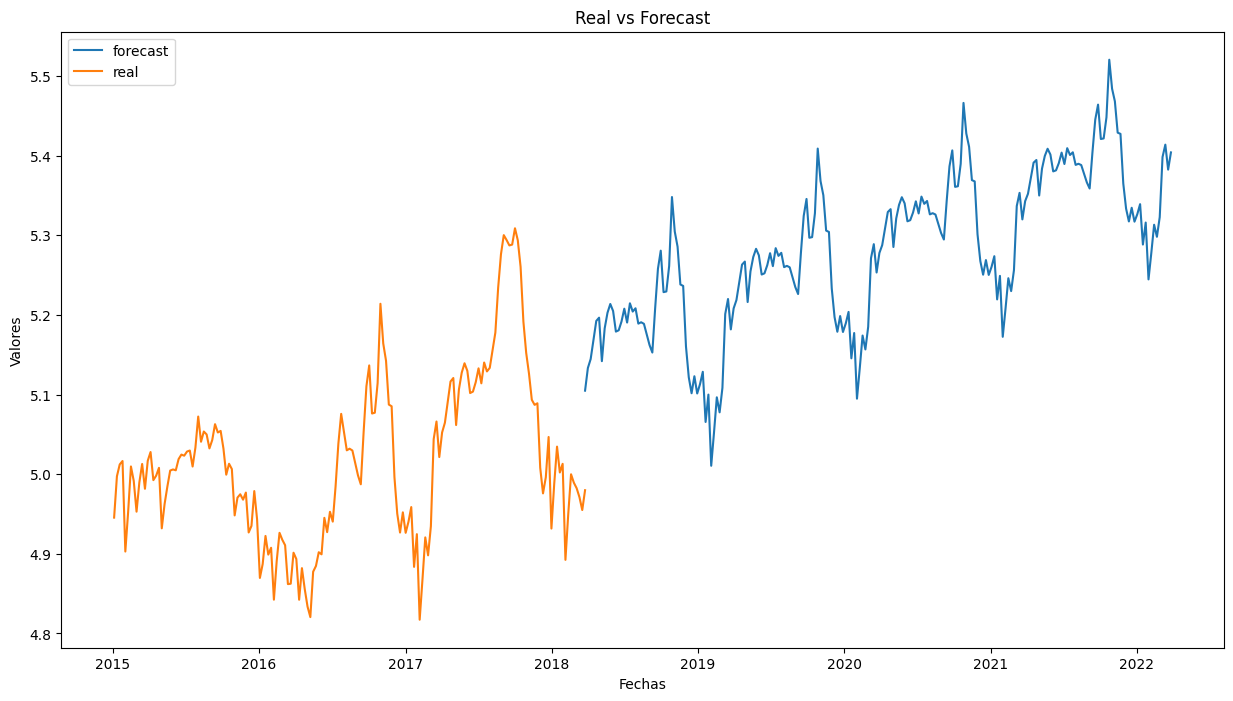

In [49]:
fig = plt.figure(figsize=(15, 8))
plt.plot(np.log(prediction), label = 'forecast')
plt.plot(df1['Log_AveragePrice'], label= 'real')
plt.legend()
plt.xlabel('Fechas')
plt.ylabel('Valores')
plt.title('Real vs Forecast')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b2804db8-c522-4d84-9303-c92a1545f152' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>